In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#cd /content/drive/Shareddrives/DS440 Group1/Flight_Delay_Prediction_using_Machine_Learning-main

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor

In [4]:
X_train_label = pd.read_csv('data/old_data/X_train_label.csv')
X_test_label = pd.read_csv('data/old_data/X_test_label.csv')

Y_train = pd.read_csv('data/old_data/Y_train.csv')
Y_test = pd.read_csv('data/old_data/Y_test.csv')
arr_delay_only_y_train = pd.read_csv('data/old_data/arr_delay_only_y_train.csv')
arr_delay_only_y_test = pd.read_csv('data/old_data/arr_delay_only_y_test.csv')

# For overall arrival delay

### Linear Regressison model

In [5]:
model = LinearRegression()
model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.94155730859324


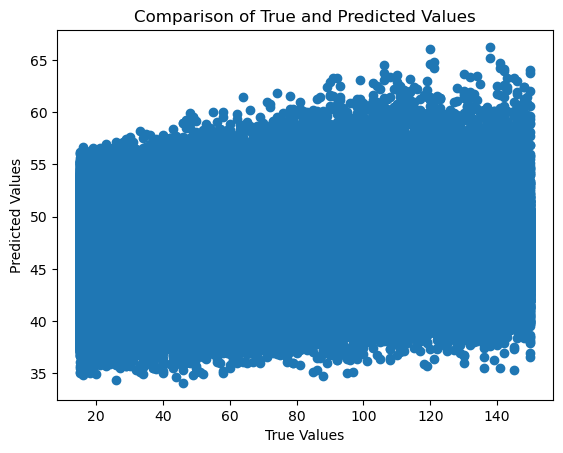

In [6]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [7]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
tree_model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.14314459848075


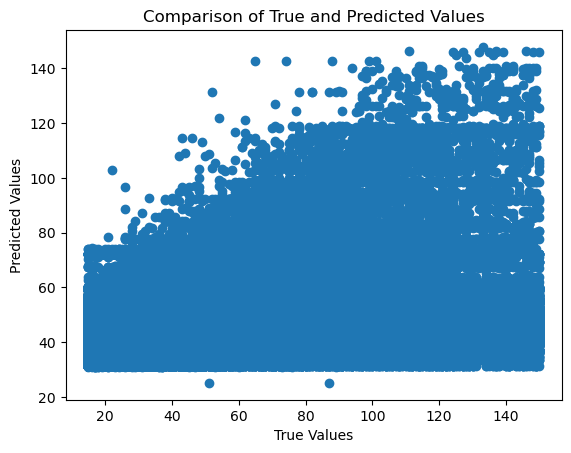

In [8]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()


### Random Forest Regressor

In [9]:
# Train the Random Forest regressor with custom depth and other parameters
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_label, arr_delay_only_y_train.values.ravel())  # ravel() to convert column vector to 1d array

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 24.097529904599973


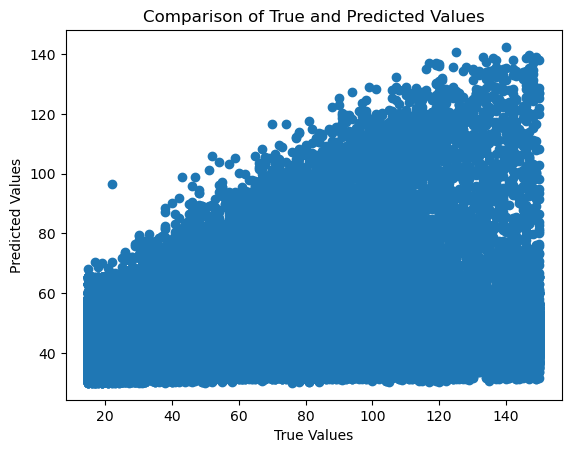

In [10]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

# For individual delay components

### Linear Regression




In [11]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 18.23164688895231
DELAY_DUE_WEATHER: 4.058932616123247
DELAY_DUE_SECURITY: 0.30917666721250187
DELAY_DUE_NAS: 8.560322130050302
DELAY_DUE_LATE_AIRCRAFT: 18.859664220923914


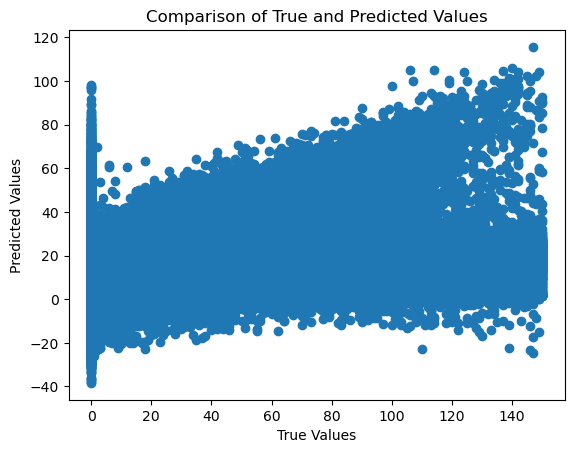

In [12]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [13]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)  # Example: max_depth=10, min_samples_leaf=5
tree_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 17.429049897340168
DELAY_DUE_WEATHER: 4.03003237637786
DELAY_DUE_SECURITY: 0.304593604056985
DELAY_DUE_NAS: 8.090276427967423
DELAY_DUE_LATE_AIRCRAFT: 18.18774973244225


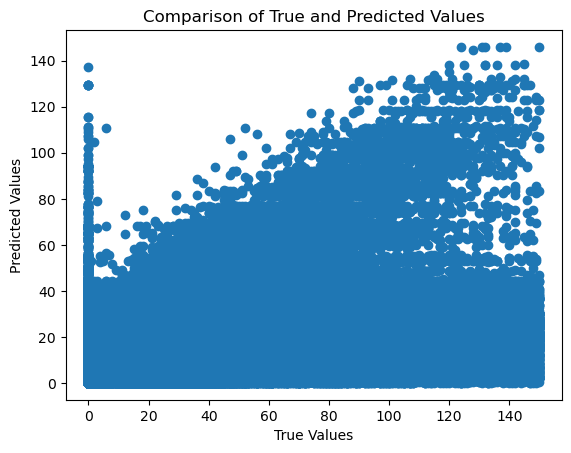

In [14]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")


Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 17.36220184605546
DELAY_DUE_WEATHER: 4.022726910569796
DELAY_DUE_SECURITY: 0.3047948764284003
DELAY_DUE_NAS: 8.02496293730484
DELAY_DUE_LATE_AIRCRAFT: 18.13794717345994


: 

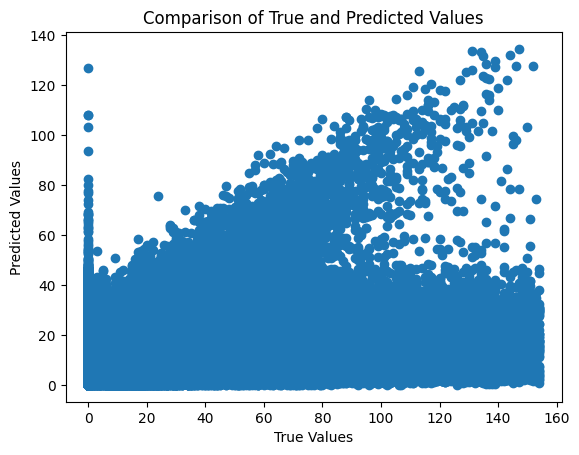

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Neural Network

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_label.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5)  # Number of output neurons should match the number of columns in Y
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_label, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test_label, Y_test)
print("Test Mean Absolute Error:", mae)

# Make predictions
Y_pred = model.predict(X_test_label)

# Calculate Mean Absolute Error for each column
mae_columns = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for each column:")
print(mae_columns)
pd.DataFrame(history.history).to_csv("./models/results/NN_test.csv")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 960.5395 - mae: 14.0165 - val_loss: 383.7061 - val_mae: 10.7690
Epoch 2/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 387.8047 - mae: 10.9264 - val_loss: 383.3756 - val_mae: 10.9392
Epoch 3/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 379.7815 - mae: 10.3894 - val_loss: 375.3791 - val_mae: 10.2235
Epoch 4/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 375.5534 - mae: 10.2456 - val_loss: 378.0898 - val_mae: 10.0290
Epoch 5/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 375.3845 - mae: 10.2345 - val_loss: 375.3427 - val_mae: 10.2000
Epoch 6/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 375.6388 - mae: 10.2285 - val_loss: 374.5825 - val_mae: 10.2011
Epoch 7/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 376.1682 - mae: 10.2335 - val_loss: 376.8842 - val_mae: 9.9423
Epoch 8/50
9185/9185 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 373.9922 - mae: 10.1989 - val_loss: 377.2943 - va

### XGBoost Regressor

In [ ]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_label, Y_train)

Y_test_pred = xgb_regressor.predict(X_test_label)
Y_train_pred = xgb_regressor.predict(X_train_label)

test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Absolute Error: 9.304495811462402
Test Mean Absolute Error: 9.53446102142334
Train Mean Squared Error: 328.3998718261719
Test Mean Squared Error: 345.01434326171875


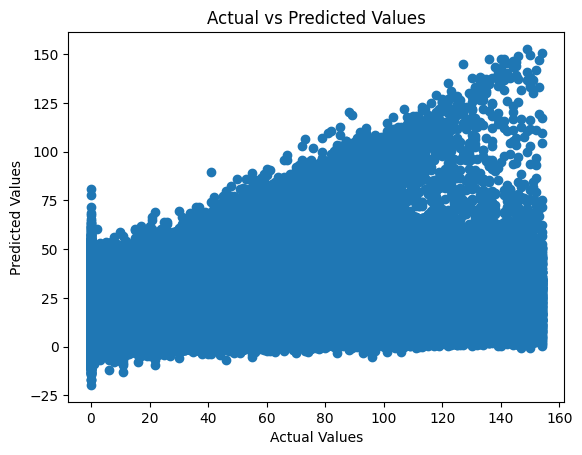

In [ ]:
plt.scatter(Y_train, Y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

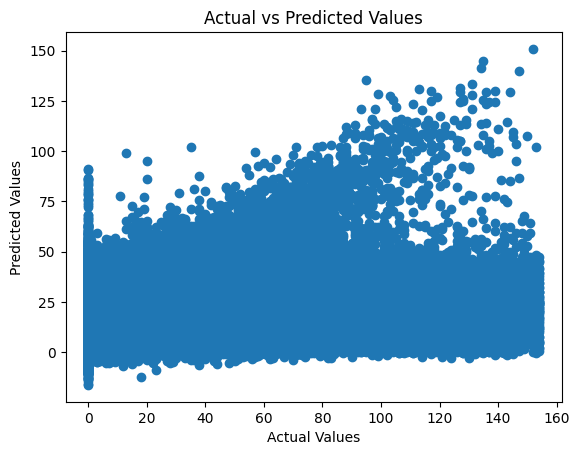

In [ ]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()